In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
DB = "./insurance.csv"

DB = pd.read_csv(DB)

DB.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
DB.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


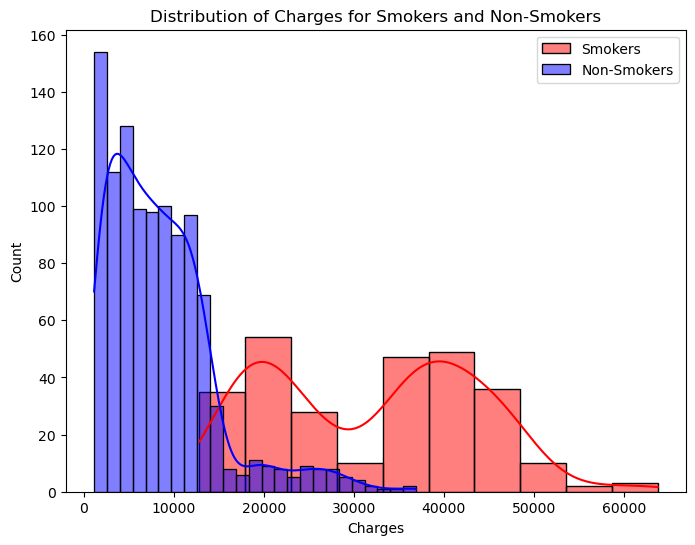

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(DB[DB['smoker'] == "yes"]['charges'], color='r', kde=True, label='Smokers')
sns.histplot(DB[DB['smoker'] == "no"]['charges'], color='b',  kde=True, label='Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.legend()
plt.show()

In [6]:
# Encode categorical variables
label_encoder = LabelEncoder()
DB['sex'] = label_encoder.fit_transform(DB['sex']) # male = 1  | female= 0 
DB['smoker'] = label_encoder.fit_transform(DB['smoker'])# yes = 1 |  no = 0

DB

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [48]:
# Split data into features (X) and target (y)
X = DB[['age', 'sex', 'children', 'smoker', 'bmi']]
y = DB['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)


In [49]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 4404.388017122889
Mean Squared Error: 40214895.79906374
Root Mean Squared Error: 6341.521568130454


In [55]:
# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.7039391348929493


In [51]:
# male = 1  | female= 0 
# yes = 1 |  no = 0
new_DB = pd.DataFrame({'age': [18], 'sex': [0], 'children': [0], 'smoker': [0], "bmi":[31.920] })
predicted_charges = model.predict(new_DB)
print(f'Predicted Charges: {predicted_charges[0]}')

Predicted Charges: 2596.9490506678994


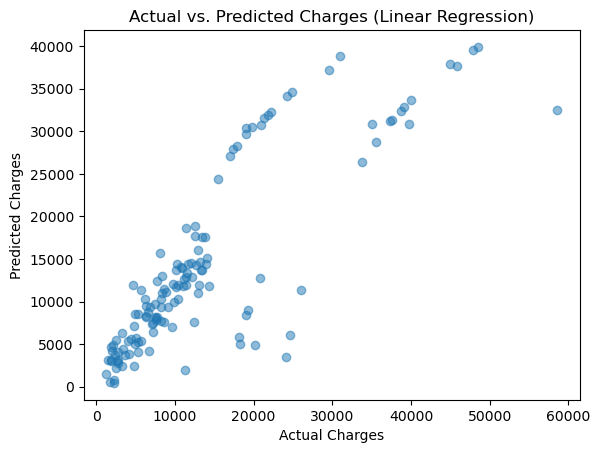

In [52]:
# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, )
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges") 
plt.title("Actual vs. Predicted Charges (Linear Regression)")
plt.show()
